In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# GMM Class

In [2]:
class GMM:
    def __init__(self, k):
        self.k = k # number of clusters

    def fit(self, X, initial_mean, initial_cov_matrix, max_iter=100):
        
        μ = initial_mean
        Σ = initial_cov_matrix
        
        # Gets the labels of the initial clusters given the initial Gaussians 
        z = np.argmax(np.array([[self.__gaussian(X_i, μ[j], Σ[j]) for j in range(self.k)] for X_i in X]), axis=1)
        
        # Initial probability of the classes
        ϕ = np.array([np.sum((z==j)) / len(z) for j in range(self.k)])
        
        w = np.zeros((len(X), self.k))
        for iteration in range(max_iter):
            for i, X_i in enumerate(X):
                w_j = np.zeros(self.k)
                for j in range(self.k):
                    w_j[j] = self.__gaussian(X_i, μ[j], Σ[j]) * ϕ[j] / np.sum([self.__gaussian(X_i, μ[l], Σ[l])*ϕ[l] for l in range(self.k)])
                w[i] = w_j 

            μ = np.array([(w.T[j] @ X) / np.sum(w.T[j]) for j in range(self.k)])
            Σ = np.array([np.sum([w.T[j][i] * np.outer(X_i - μ[j], (X_i - μ[j])) for i, X_i in enumerate(X)] / np.sum(w.T[j]) ,axis=0) for j in range(self.k)])

            # Updates the cluster labels
            z = np.argmax(np.array([[self.__gaussian(X_i, μ[j], Σ[j]) for j in range(self.k)] for X_i in X]), axis=1)
            ϕ = np.array([np.mean(w.T[j]) for j in range(self.k)])
            
        self.means = μ
        self.covariance_matrices = Σ
        self.labels = z
        
    def predict(self, x):
        return np.array([np.argmax(self.__predict_each(x_i)) for x_i in x])
    
    def predict_proba(self, x):
        return np.array([self.__predict_each(x_i) for x_i in x])
        
    # Private methods
    def __gaussian(self, x, μ, Σ):
        return np.exp(-(1/2)* (x-μ) @ np.linalg.inv(Σ) @ np.transpose(x-μ)) / (np.sqrt( (2*np.pi)**self.k * np.linalg.det(Σ) ))
    
    def __predict_each(self, x):
        return np.array([self.__gaussian(x, self.means[j], self.covariance_matrices[j]) for j in range(self.k)])

# Test

### Make data

<IPython.core.display.Javascript object>


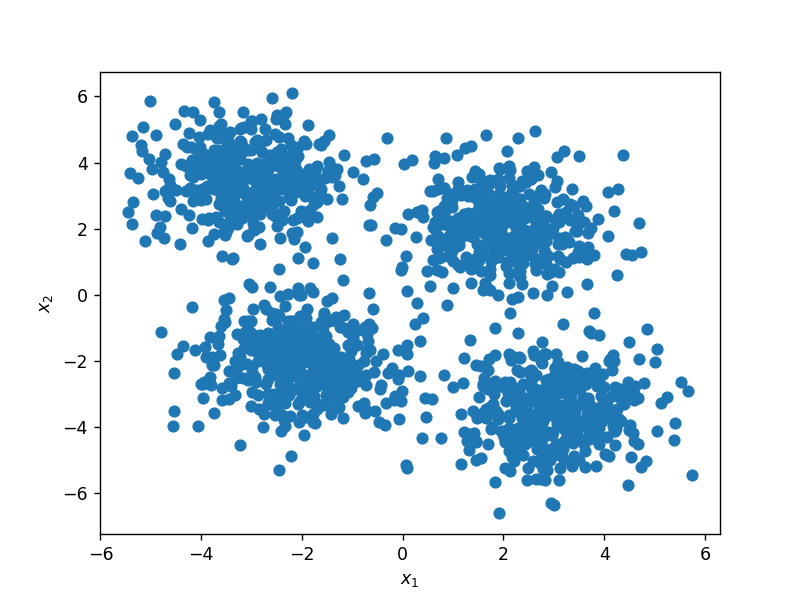

Text(0, 0.5, '$x_2$')

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, centers=[[-2.0,-2.0], [2.0,2.0], [3, -3.5], [-3, 3.5]], cluster_std=[1, 1, 1, 1],
                  n_features=2, random_state=200, shuffle=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure()
plt.scatter(X_train.T[0], X_train.T[1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

### Run the model

In [4]:
μ = np.array([[-3, -3], [2, 4], [5,-6], [-6,4]])
Σ = np.array([[[1., 0], [0 ,1.]], [[1., 0], [0 ,1.]],[[1., 0], [0 ,1.]],[[1., 0], [0 ,1.]]])
k = len(μ)

GMM_model = GMM(k)
GMM_model.fit(X_train, μ, Σ, 30)
print("μ = ", GMM_model.means, "\nΣ = ", GMM_model.covariance_matrices)

μ =  [[-2.06089482 -2.02457741]
 [ 1.97087402  2.06828129]
 [ 2.97544684 -3.48723657]
 [-3.06620677  3.46731059]] 
Σ =  [[[ 0.94628892 -0.0605252 ]
  [-0.0605252   1.00441269]]

 [[ 0.95811429 -0.04594995]
  [-0.04594995  1.05757987]]

 [[ 0.98201564  0.0537131 ]
  [ 0.0537131   1.03305001]]

 [[ 0.94730457 -0.03465124]
  [-0.03465124  0.97661991]]]


### Make predictions on the test data

In [5]:
GMM_model.predict(X_test)

array([2, 0, 1, 3, 3, 1, 1, 2, 2, 2, 1, 3, 3, 1, 3, 2, 1, 2, 3, 1, 2, 1,
       3, 2, 1, 3, 0, 3, 3, 2, 2, 2, 3, 0, 3, 0, 3, 1, 3, 2, 3, 1, 2, 1,
       3, 0, 1, 1, 1, 3, 0, 3, 2, 3, 0, 1, 3, 3, 3, 3, 2, 0, 0, 2, 3, 1,
       1, 3, 1, 3, 1, 1, 3, 0, 2, 0, 1, 1, 1, 3, 3, 2, 2, 0, 3, 1, 0, 2,
       1, 1, 0, 3, 3, 0, 0, 0, 3, 1, 3, 3, 3, 2, 2, 0, 2, 2, 3, 2, 1, 0,
       0, 3, 2, 1, 0, 1, 3, 0, 1, 3, 1, 0, 1, 0, 1, 2, 2, 0, 3, 3, 3, 0,
       2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 3, 3, 2, 2, 1, 0, 0, 1, 2, 3,
       2, 2, 2, 3, 1, 0, 3, 0, 2, 3, 1, 3, 2, 2, 3, 2, 2, 1, 2, 0, 2, 0,
       0, 3, 3, 0, 0, 0, 0, 3, 2, 2, 2, 1, 3, 1, 2, 3, 1, 1, 3, 2, 0, 1,
       1, 1, 0, 2, 3, 3, 3, 1, 2, 1, 0, 3, 3, 1, 1, 2, 2, 3, 0, 2, 3, 1,
       2, 2, 3, 1, 1, 3, 1, 3, 3, 1, 0, 1, 3, 1, 3, 3, 0, 1, 1, 1, 1, 0,
       0, 1, 2, 3, 1, 0, 2, 2, 1, 3, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 2, 1, 0, 0, 2, 2, 1, 3, 2, 1, 2, 3, 3, 2, 3, 3, 1, 0, 3, 3, 0,
       0, 2, 3, 3, 0, 2, 3, 1, 1, 2, 0, 1, 1, 1, 0,

In [7]:
GMM_model.predict_proba(X_test) # Each row contains the probability of each X_train row to be in a class j

array([[6.15917784e-07, 1.73846445e-11, 7.50923966e-03, 1.29186944e-21],
       [1.08447799e-02, 2.17233908e-08, 7.63856770e-06, 6.96743139e-11],
       [2.43669070e-12, 1.16744982e-02, 1.15634807e-12, 1.61607685e-07],
       ...,
       [2.13894599e-02, 6.18835226e-10, 2.29456504e-07, 1.38475876e-10],
       [1.07107975e-08, 1.10798536e-02, 2.46423935e-06, 3.02576266e-10],
       [4.17254627e-07, 4.59148804e-09, 2.00030785e-02, 1.22188563e-19]])

# Plot

<IPython.core.display.Javascript object>


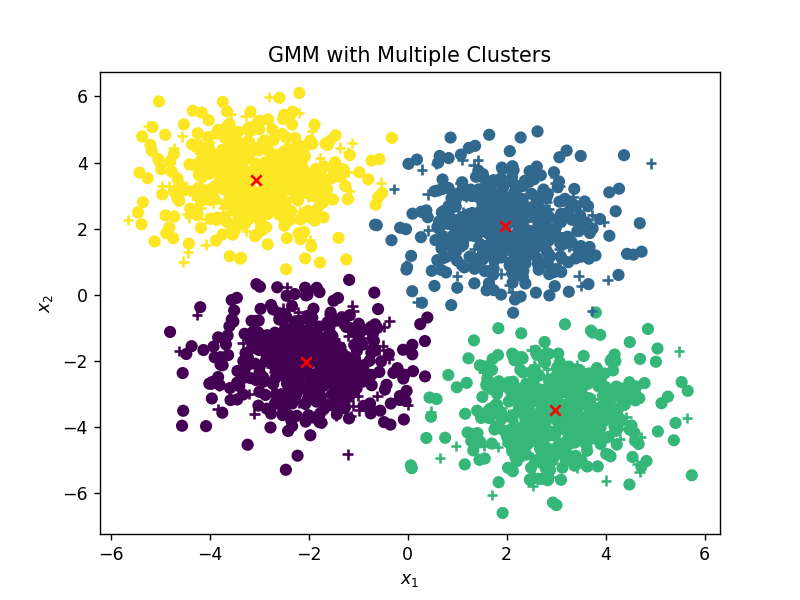

Text(0.5, 1.0, 'GMM with Multiple Clusters')

In [8]:
plt.figure()
plt.scatter(X_train.T[0], X_train.T[1], c=GMM_model.labels)
plt.scatter(X_test.T[0], X_test.T[1], c=GMM_model.predict(X_test), marker='+')
plt.scatter(GMM_model.means.T[0], GMM_model.means.T[1], c='red', marker='x')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('GMM with Multiple Clusters')

# Sklearn implementation

In [9]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4, random_state=0).fit(X_train)
gm.means_

array([[-3.06488851,  3.46646237],
       [ 2.97462321, -3.48682665],
       [-2.06170532, -2.02498523],
       [ 1.97166692,  2.06810757]])

In [10]:
gm.predict(X_test) # Sklearn has different numberings of the clusters, but in essence they are the same

array([1, 2, 3, 0, 0, 3, 3, 1, 1, 1, 3, 0, 0, 3, 0, 1, 3, 1, 0, 3, 1, 3,
       0, 1, 3, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 3, 0, 1, 0, 3, 1, 3,
       0, 2, 3, 3, 3, 0, 2, 0, 1, 0, 2, 3, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3,
       3, 0, 3, 0, 3, 3, 0, 2, 1, 2, 3, 3, 3, 0, 0, 1, 1, 2, 0, 3, 2, 1,
       3, 3, 2, 0, 0, 2, 2, 2, 0, 3, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 3, 2,
       2, 0, 1, 3, 2, 3, 0, 2, 3, 0, 3, 2, 3, 2, 3, 1, 1, 2, 0, 0, 0, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 3, 0, 0, 1, 1, 3, 2, 2, 3, 1, 0,
       1, 1, 1, 0, 3, 2, 0, 2, 1, 0, 3, 0, 1, 1, 0, 1, 1, 3, 1, 2, 1, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 3, 0, 3, 1, 0, 3, 3, 0, 1, 2, 3,
       3, 3, 2, 1, 0, 0, 0, 3, 1, 3, 2, 0, 0, 3, 3, 1, 1, 0, 2, 1, 0, 3,
       1, 1, 0, 3, 3, 0, 3, 0, 0, 3, 2, 3, 0, 3, 0, 0, 2, 3, 3, 3, 3, 2,
       2, 3, 1, 0, 3, 2, 1, 1, 3, 0, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 2, 2,
       2, 1, 3, 2, 2, 1, 1, 3, 0, 1, 3, 1, 0, 0, 1, 0, 0, 3, 2, 0, 0, 2,
       2, 1, 0, 0, 2, 1, 0, 3, 3, 1, 2, 3, 3, 3, 2,